# Методы машинного обучения.

## ЛР7. - Классификатор на базе многослойного персептрона.

Осуществить генерацию исходных данных, которые представляют собой двумерное признаковое пространство, сгруппированное в 6 или более областей, отнесенных не менее чем к 4 классам (Пример взаимного расположения представлен на рисунке 1). В каждой области содержится не менее 50 примеров, и данные распределены по нормальному закону распределения.


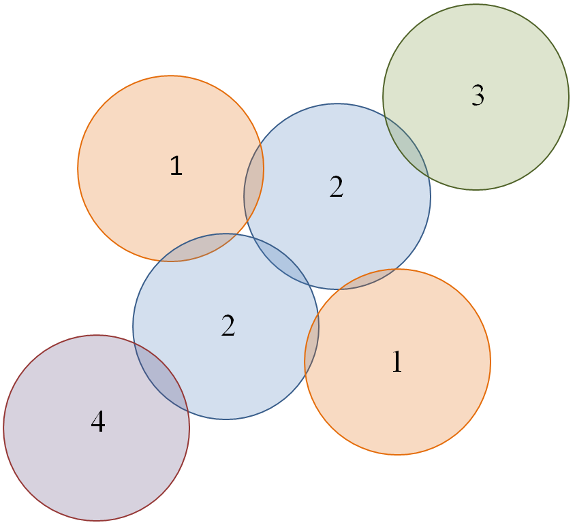

Рисунок 1. Пример взаимного расположения 6 областей относящихся к 4 классам.

Необходимо:
- Визуализировать сгенерированные данные на плоскости.
- Для  сгенерированного датасета осуществить построение классификатора на базе многослойного персептрона.
- Обосновать выбор числа слоев и нейронов в каждом слое.
- Сравнить работу нейросети в зависимости от выбранной функции активации (сигмоида с разными значениями параметра крутизны (b=1,b=100);  ReLU ).
- В процессе обучения визуализировать разделяющие поверхности промежуточного слоя.
- В процессе обучения построить графики изменения среднеквадратических ошибок на обучающей и тестовой  выборках. Обосновать момент остановки процесса обучения.
- Оценить точность, полноту, F-меру. Построить матрицу ошибок.
- Предусмотреть дополнительную возможность ввода пользователем новых, не входящих в сгенерированный датасет данных. Визуализировать их совместно с обучающей выборкой и разделяющими поверхностями, осуществить их классификацию.
- Обратите внимание, что новые данные (из предыдущего пункта), далеко отстоящие от известных областей, также уверенно классифицируются обученной моделью. Необходимо решить задачу классификации таких данных как аномальных. Одним из вариантов решения является добавление в имеющийся набор данных дополнительно сгенерированных равномерно распределенных примеров с новой меткой класса с последующим расширением и переобучением модели нейросети.


## Выполнение

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from sklearn.neural_network._multilayer_perceptron import MLPClassifier
from sklearn.neural_network._base import ACTIVATIONS
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, matthews_corrcoef
import seaborn as sns

In [ ]:
import tensorflow
from tensorflow.keras import losses, metrics, optimizers
from tensorflow.keras.initializers import HeNormal, GlorotNormal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
import tensorflow.math as tfm

In [ ]:
import warnings
warnings.filterwarnings('ignore')

[0 1 2 3]


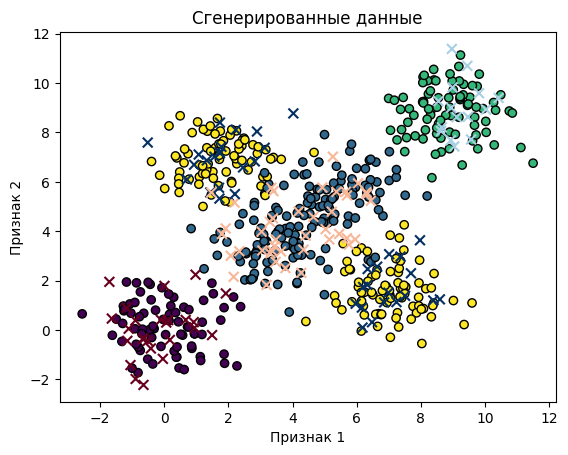

In [ ]:
centers = [[0, 0], [3.5, 3.5], [5.5, 5.5], [9, 9], [7, 1.5], [1.5, 7]]
X, y = make_blobs(n_samples=600, centers=centers, random_state=0)
y = list(map(lambda x: x if (x < 2) else x - 1, y))
y = list(map(lambda x: x if (x < 4) else x - 1, y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(np.unique(y_test))

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', label='Обучающая выборка')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdBu, marker='x', s=50, label='Тестовая выборка')
plt.title('Сгенерированные данные')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

In [ ]:
feature_vector_length = 2
num_groups = len(centers)
num_classes = 4
input_shape = (feature_vector_length,)

In [ ]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
def plot_results(metrics, title=None, ylabel=None, xlim=None, ylim=None, metric_name=None, color=None):

    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim(xlim)
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator((xlim[1] - xlim[0])/10))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4101 - loss: 2.7241 - val_accuracy: 0.4500 - val_loss: 2.1915
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4701 - loss: 2.1728 - val_accuracy: 0.4667 - val_loss: 1.8867
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4876 - loss: 1.9331 - val_accuracy: 0.4583 - val_loss: 1.6660
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4792 - loss: 1.6842 - val_accuracy: 0.4583 - val_loss: 1.5267
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4522 - loss: 1.6089 - val_accuracy: 0.4667 - val_loss: 1.4376
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4610 - loss: 1.4752 - val_accuracy: 0.4417 - val_loss: 1.3805
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4310 - loss: 1.4126 - val_accuracy: 0.3833 - val_loss: 1.3339
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3935 - loss: 1.3571 - val_accuracy: 0.3250 - 

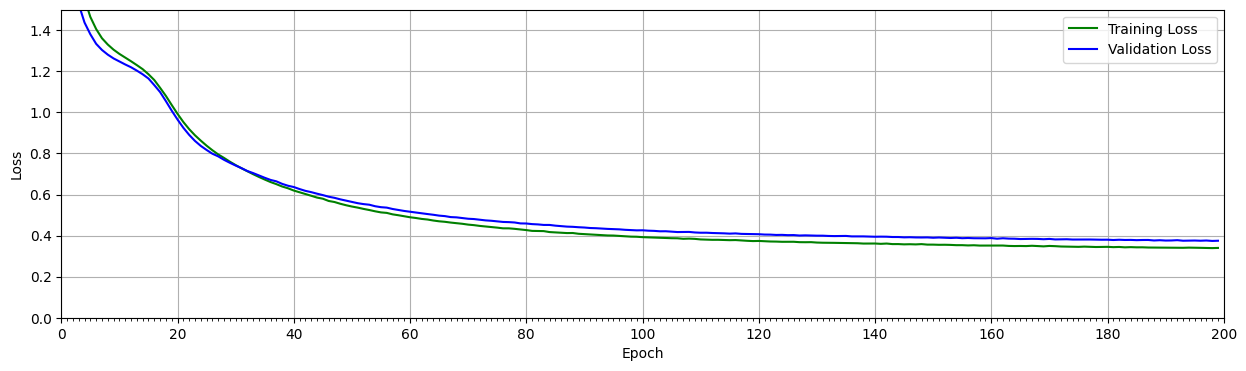

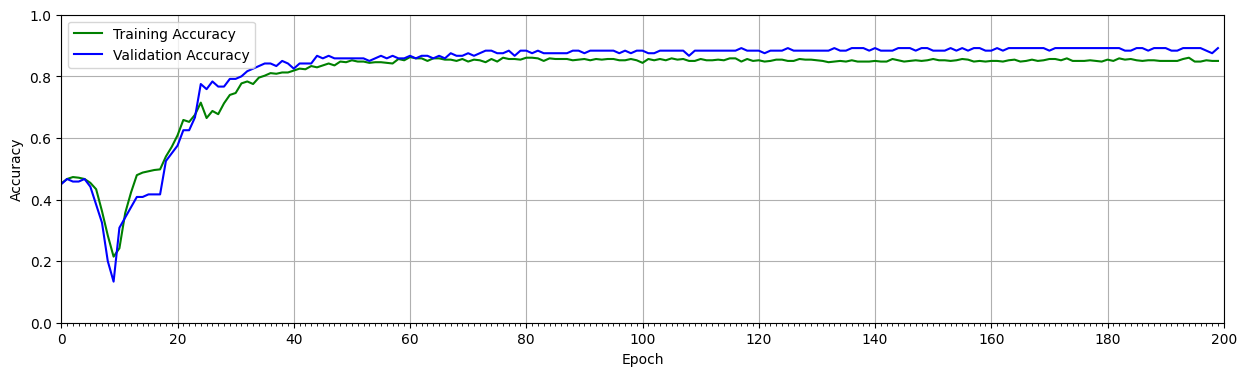

In [ ]:
model = Sequential()
model.add(Dense(feature_vector_length, input_shape=input_shape, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

epochs = 200

training_results = model.fit(X_train, y_train, batch_size=16, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

train_loss = training_results.history["loss"]
train_acc  = training_results.history["accuracy"]
valid_loss = training_results.history["val_loss"]
valid_acc  = training_results.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
            xlim = [0, epochs],
            ylim = [0.0, 1.5],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
            xlim = [0, epochs],
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

In [ ]:
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8660 - loss: 0.4062
Test results - Loss: 0.3749217092990875 - Accuracy: 0.8916666507720947%


In [ ]:
def plot_surfaces(model, h=0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()], verbose=1)
    Z = np.argmax(Z, axis=1).reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolors='k', label='Обучающая выборка')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdBu, marker='x', s=50, label='Тестовая выборка')
    plt.title(f'Разделяющие поверхности (ReLu)')
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.legend()
    plt.show()

19599/19599 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step


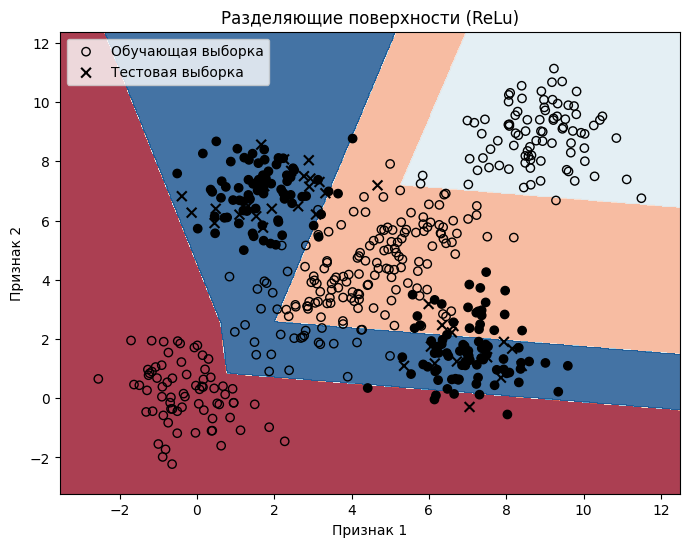

In [ ]:
plot_surfaces(model)

In [ ]:
model_1 = model

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3650 - loss: 1.3642 - val_accuracy: 0.3000 - val_loss: 1.3970
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3493 - loss: 1.3521 - val_accuracy: 0.3000 - val_loss: 1.3708
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3401 - loss: 1.3421 - val_accuracy: 0.3000 - val_loss: 1.3533
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3070 - loss: 1.3385 - val_accuracy: 0.3000 - val_loss: 1.3390
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3581 - loss: 1.3105 - val_accuracy: 0.3000 - val_loss: 1.3296
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3216 - loss: 1.3146 - val_accuracy: 0.3000 - val_loss: 1.3229
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3545 - loss: 1.3053 - val_accuracy: 0.3000 - val_loss: 1.3159
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3706 - loss: 1.2964 - val_accuracy: 0.3000 - 

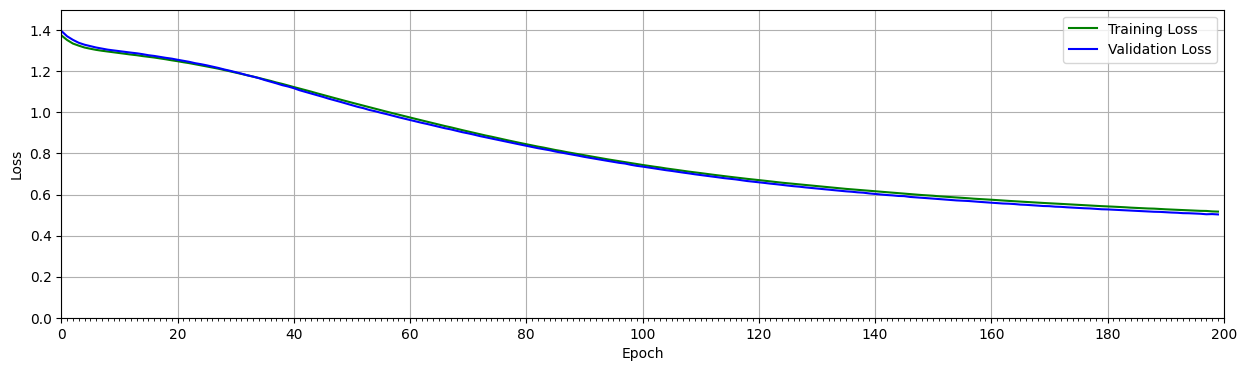

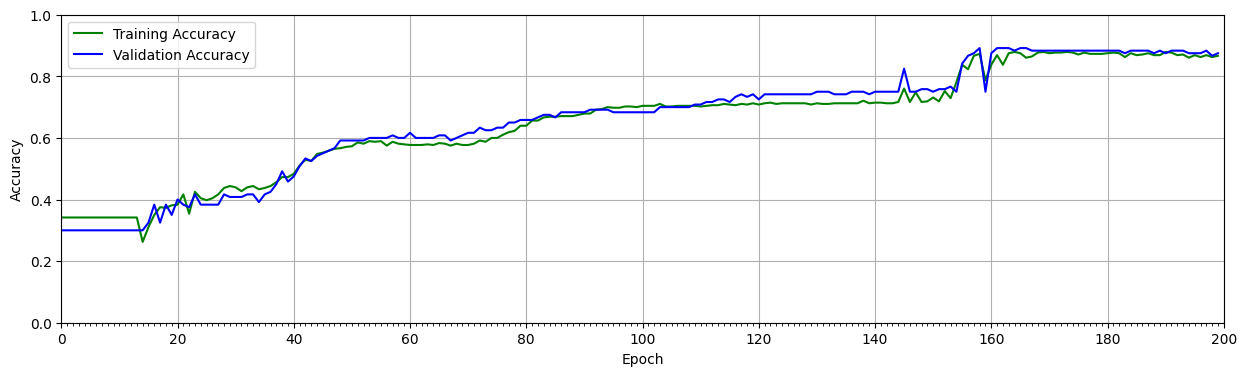

In [ ]:
model = Sequential()
model.add(Dense(feature_vector_length, input_shape=input_shape, activation='sigmoid'))
model.add(Dense(6, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

epochs = 200

training_results = model.fit(X_train, y_train, batch_size=16, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

train_loss = training_results.history["loss"]
train_acc  = training_results.history["accuracy"]
valid_loss = training_results.history["val_loss"]
valid_acc  = training_results.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
            xlim = [0, epochs],
            ylim = [0.0, 1.5],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
            xlim = [0, epochs],
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

In [ ]:
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8531 - loss: 0.5120 
Test results - Loss: 0.5030826926231384 - Accuracy: 0.875%


19599/19599 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step


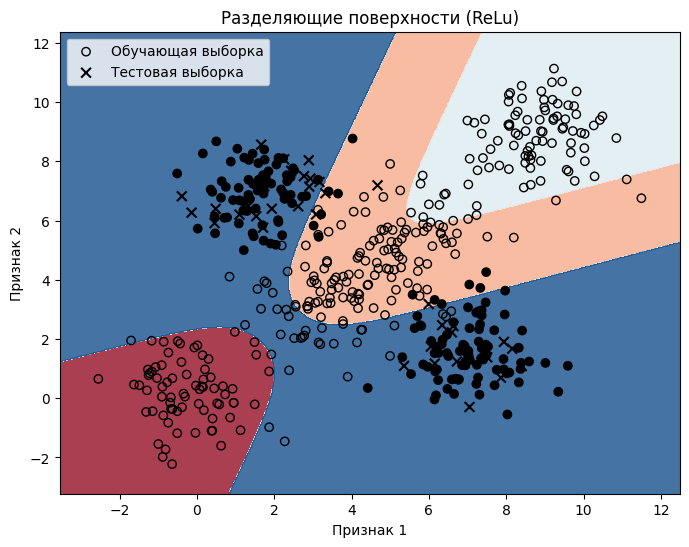

In [ ]:
plot_surfaces(model)

In [ ]:
model_2 = model

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.3374 - loss: 1.3902 - val_accuracy: 0.3750 - val_loss: 1.4006
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3358 - loss: 1.3863 - val_accuracy: 0.3667 - val_loss: 1.3714
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3458 - loss: 1.3384 - val_accuracy: 0.3750 - val_loss: 1.3523
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3760 - loss: 1.3274 - val_accuracy: 0.4250 - val_loss: 1.3395
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4263 - loss: 1.3151 - val_accuracy: 0.4500 - val_loss: 1.3257
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4850 - loss: 1.2886 - val_accuracy: 0.4667 - val_loss: 1.3141
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4926 - loss: 1.2724 - val_accuracy: 0.4583 - val_loss: 1.2980
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5128 - loss: 1.2508 - val_accuracy: 0.4583 - 

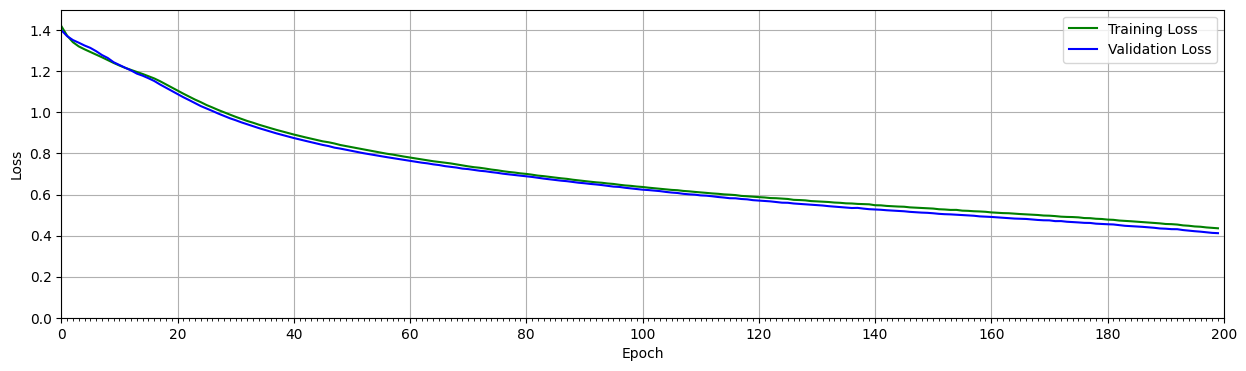

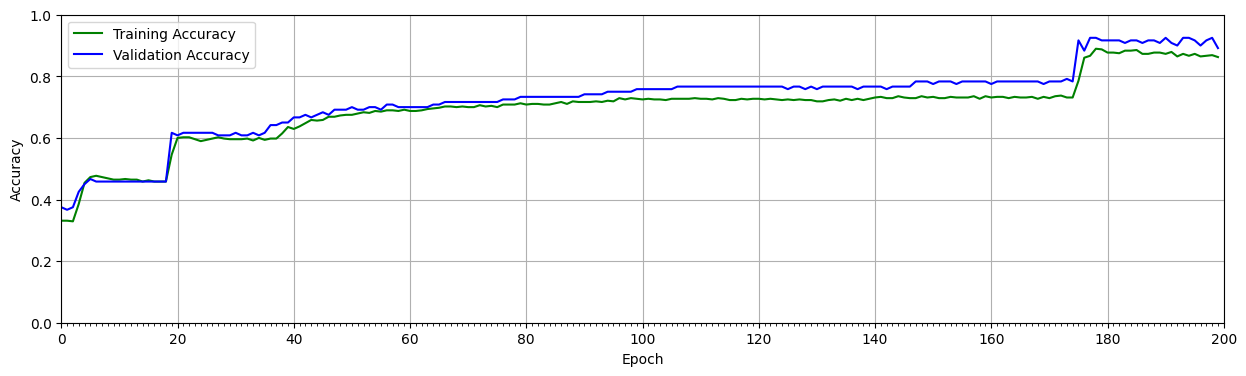

In [ ]:
def sigmoid_b5(x):
    return tfm.divide(1.0, tfm.add(1.0, tfm.exp(tfm.multiply(x, -5.0))))

model = Sequential()
model.add(Dense(feature_vector_length, input_shape=input_shape, activation=Activation(sigmoid_b5)))
model.add(Dense(6, activation=Activation(sigmoid_b5)))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

epochs = 200

training_results = model.fit(X_train, y_train, batch_size=16, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

train_loss = training_results.history["loss"]
train_acc  = training_results.history["accuracy"]
valid_loss = training_results.history["val_loss"]
valid_acc  = training_results.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
            xlim = [0, epochs],
            ylim = [0.0, 1.5],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
            xlim = [0, epochs],
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

In [ ]:
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8765 - loss: 0.4165 
Test results - Loss: 0.41181689500808716 - Accuracy: 0.8916666507720947%


19599/19599 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step


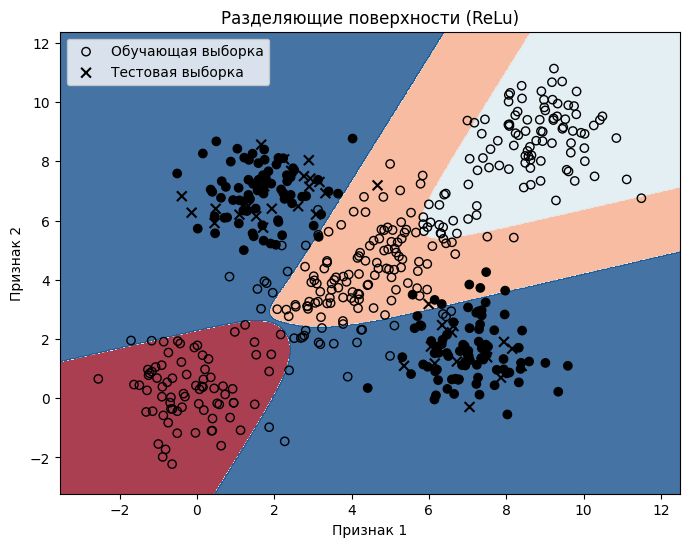

In [ ]:
plot_surfaces(model)

In [ ]:
model_3 = model

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3460 - loss: 1.4413 - val_accuracy: 0.3000 - val_loss: 1.4452
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3516 - loss: 1.4008 - val_accuracy: 0.3000 - val_loss: 1.4110
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3352 - loss: 1.3865 - val_accuracy: 0.3000 - val_loss: 1.3847
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3523 - loss: 1.3606 - val_accuracy: 0.3000 - val_loss: 1.3677
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3673 - loss: 1.3312 - val_accuracy: 0.3000 - val_loss: 1.3542
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3012 - loss: 1.3644 - val_accuracy: 0.3000 - val_loss: 1.3441
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3591 - loss: 1.3238 - val_accuracy: 0.3000 - val_loss: 1.3386
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3411 - loss: 1.3278 - val_accuracy: 0.3000 - 

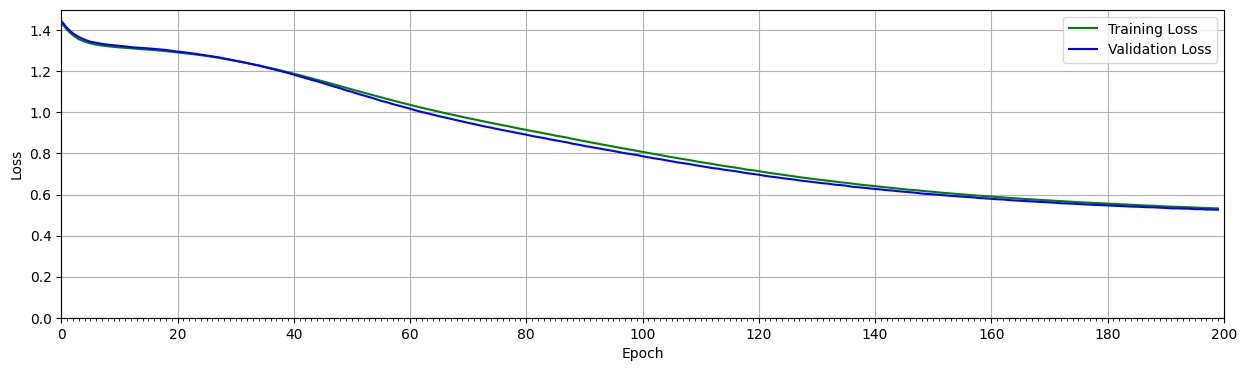

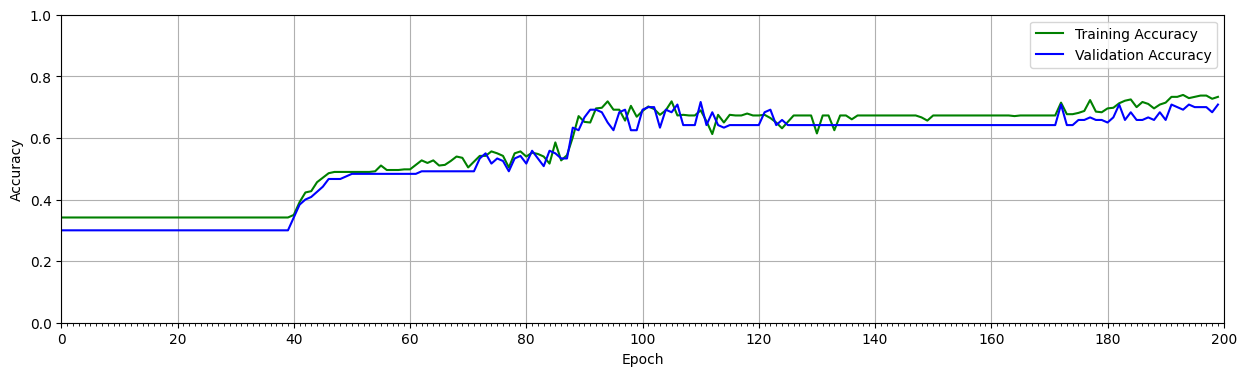

In [ ]:
model = Sequential()
model.add(Dense(feature_vector_length, input_shape=input_shape, activation='sigmoid'))
model.add(Dense(6, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

epochs = 200

training_results = model.fit(X_train, y_train, batch_size=16, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

train_loss = training_results.history["loss"]
train_acc  = training_results.history["accuracy"]
valid_loss = training_results.history["val_loss"]
valid_acc  = training_results.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
            xlim = [0, epochs],
            ylim = [0.0, 1.5],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
            xlim = [0, epochs],
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

In [ ]:
model.layers

[<Dense name=dense_58, built=True>,
 <Dense name=dense_59, built=True>,
 <Dense name=dense_60, built=True>]

In [ ]:
model.layers[-1]

<Dense name=dense_60, built=True>

In [ ]:
model.layers[-1].get_weights()

[array([[ 1.728625  , -0.4116334 ,  0.11985818,  0.22635433],
        [-3.8663824 ,  0.93279165,  1.6218551 ,  0.11897304],
        [ 1.2355397 ,  0.70688456, -3.210584  ,  0.808717  ],
        [-1.7030691 , -0.31527925,  3.1767893 , -0.4151889 ],
        [-4.1075263 , -0.23276335,  0.5795724 ,  0.5955979 ],
        [ 1.934804  , -0.19420017, -3.0450702 , -0.21025491]],
       dtype=float32),
 array([-0.04535279,  0.08124281,  0.39438152, -0.27245682], dtype=float32)]

In [ ]:
model.layers[-1].get_weights()[0]

array([[ 1.728625  , -0.4116334 ,  0.11985818,  0.22635433],
       [-3.8663824 ,  0.93279165,  1.6218551 ,  0.11897304],
       [ 1.2355397 ,  0.70688456, -3.210584  ,  0.808717  ],
       [-1.7030691 , -0.31527925,  3.1767893 , -0.4151889 ],
       [-4.1075263 , -0.23276335,  0.5795724 ,  0.5955979 ],
       [ 1.934804  , -0.19420017, -3.0450702 , -0.21025491]],
      dtype=float32)

In [ ]:
model.layers[-1].get_weights()[1]

array([-0.04535279,  0.08124281,  0.39438152, -0.27245682], dtype=float32)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.2185 - loss: 1.3896 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1833 - val_loss: 1.3552 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2190 - loss: 1.3391 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2500 - val_loss: 1.3335 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2267 - loss: 1.3297 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.3000 - val_loss: 1.3184 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2976 - loss: 1.3109 - precision: 0.0645 - recall: 1.3441e-04 - val_accuracy: 0.3250 - val_loss: 1.3003 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3194 - loss: 1.2843 - precision: 0.483

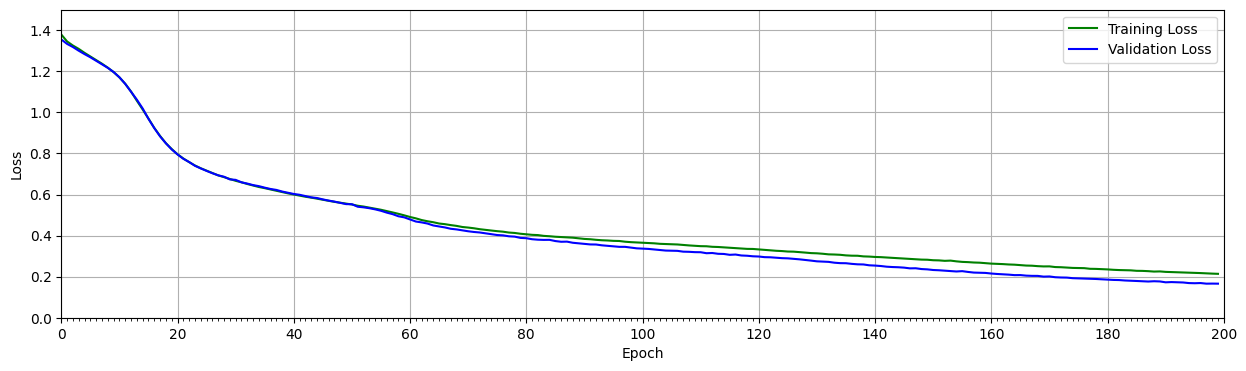

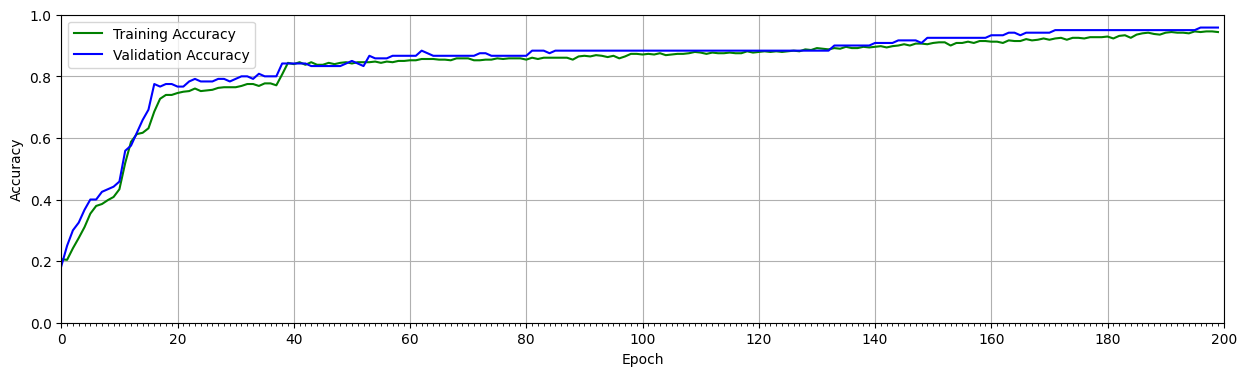

In [ ]:
model = Sequential()
initializer = GlorotNormal()
model.add(Dense(feature_vector_length, input_shape=input_shape, activation='relu', kernel_initializer=initializer))
model.add(Dense(6, activation='relu', kernel_initializer=initializer))
model.add(Dense(num_classes, activation='softmax', kernel_initializer=initializer))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall'],
)

epochs = 200

training_results = model.fit(X_train, y_train, batch_size=16, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

train_loss = training_results.history["loss"]
train_acc  = training_results.history["accuracy"]
valid_loss = training_results.history["val_loss"]
valid_acc  = training_results.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
            xlim = [0, epochs],
            ylim = [0.0, 1.5],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
            xlim = [0, epochs],
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])



19599/19599 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step


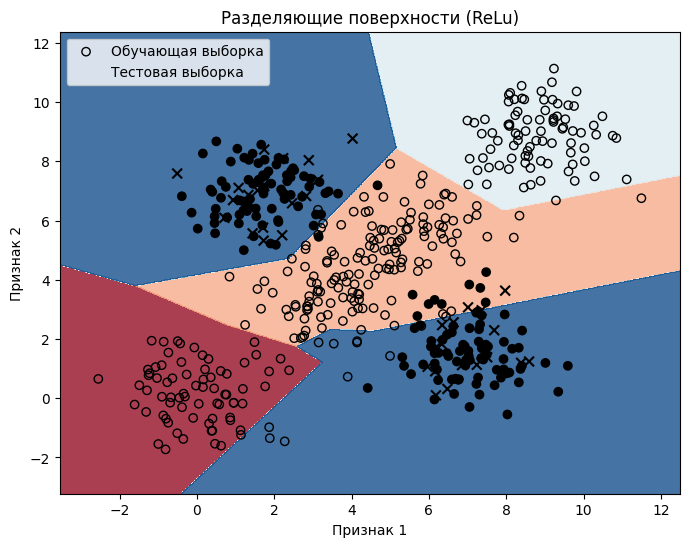

In [ ]:
plot_surfaces(model)

In [ ]:
model_new_1 = model

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.2000 - loss: 1.4564 - val_accuracy: 0.1250 - val_loss: 1.4470
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1876 - loss: 1.4127 - val_accuracy: 0.1250 - val_loss: 1.4025
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2593 - loss: 1.3736 - val_accuracy: 0.3583 - val_loss: 1.3682
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2957 - loss: 1.3807 - val_accuracy: 0.3583 - val_loss: 1.3433
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3414 - loss: 1.3518 - val_accuracy: 0.3583 - val_loss: 1.3238
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3609 - loss: 1.3248 - val_accuracy: 0.3583 - val_loss: 1.3096
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2807 - loss: 1.3284 - val_accuracy: 0.3583 - val_loss: 1.2980
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3541 - loss: 1.3104 - val_accuracy: 0.3583 -

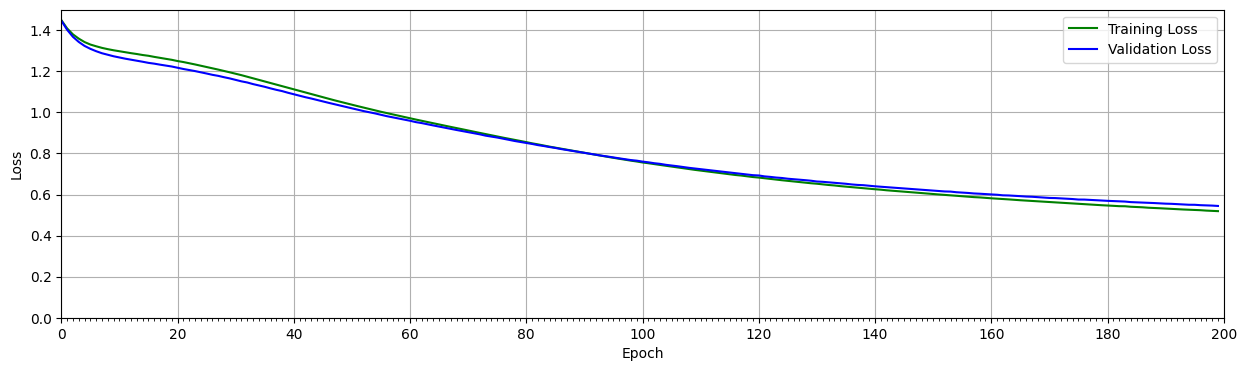

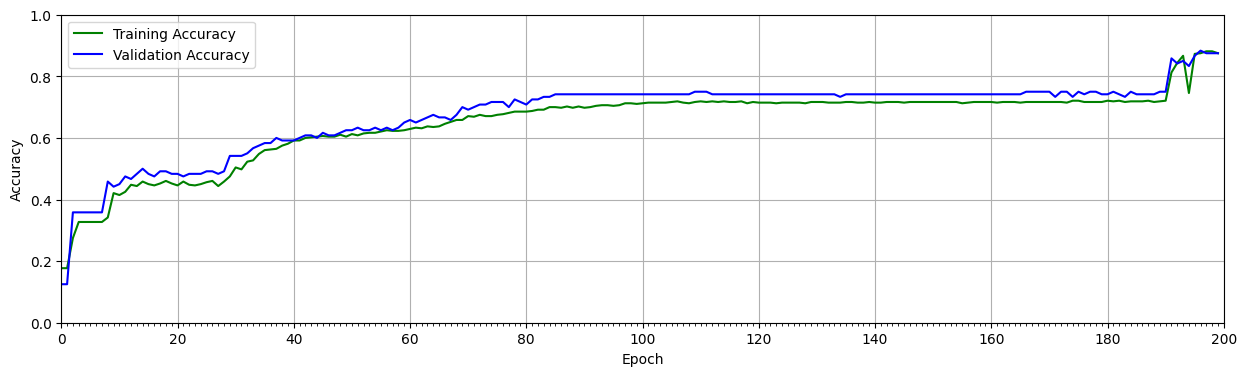

19599/19599 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step


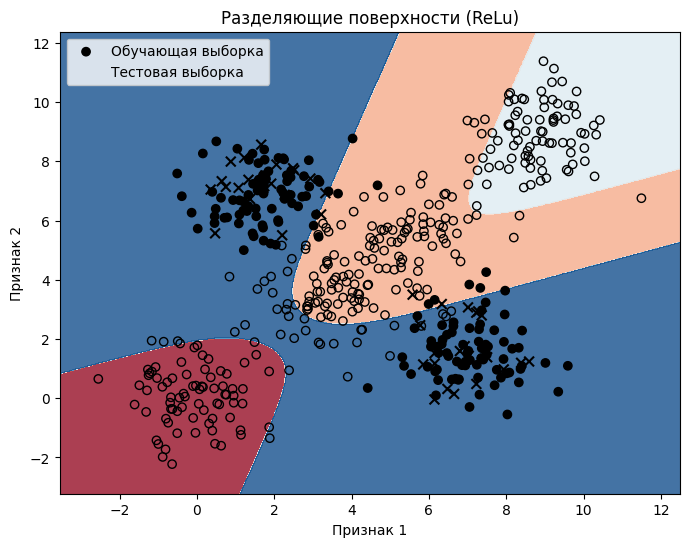

In [ ]:
model = Sequential()
initializer = GlorotNormal()
model.add(Dense(feature_vector_length, input_shape=input_shape, activation='sigmoid', kernel_initializer=initializer))
model.add(Dense(6, activation='sigmoid', kernel_initializer=initializer))
model.add(Dense(num_classes, activation='softmax', kernel_initializer=initializer))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

epochs = 200

training_results = model.fit(X_train, y_train, batch_size=16, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

train_loss = training_results.history["loss"]
train_acc  = training_results.history["accuracy"]
valid_loss = training_results.history["val_loss"]
valid_acc  = training_results.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
            xlim = [0, epochs],
            ylim = [0.0, 1.5],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
            xlim = [0, epochs],
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

plot_surfaces(model)

In [ ]:
model_new_2 = model

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3030 - loss: 1.4683 - val_accuracy: 0.3583 - val_loss: 1.4227
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3436 - loss: 1.4209 - val_accuracy: 0.3583 - val_loss: 1.3925
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2931 - loss: 1.4274 - val_accuracy: 0.3583 - val_loss: 1.3682
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3529 - loss: 1.3621 - val_accuracy: 0.3583 - val_loss: 1.3477
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3187 - loss: 1.3605 - val_accuracy: 0.3583 - val_loss: 1.3302
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3152 - loss: 1.3402 - val_accuracy: 0.3583 - val_loss: 1.3140
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3431 - loss: 1.3354 - val_accuracy: 0.3583 - val_loss: 1.2999
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2918 - loss: 1.3275 - val_accuracy: 0.3667 - 

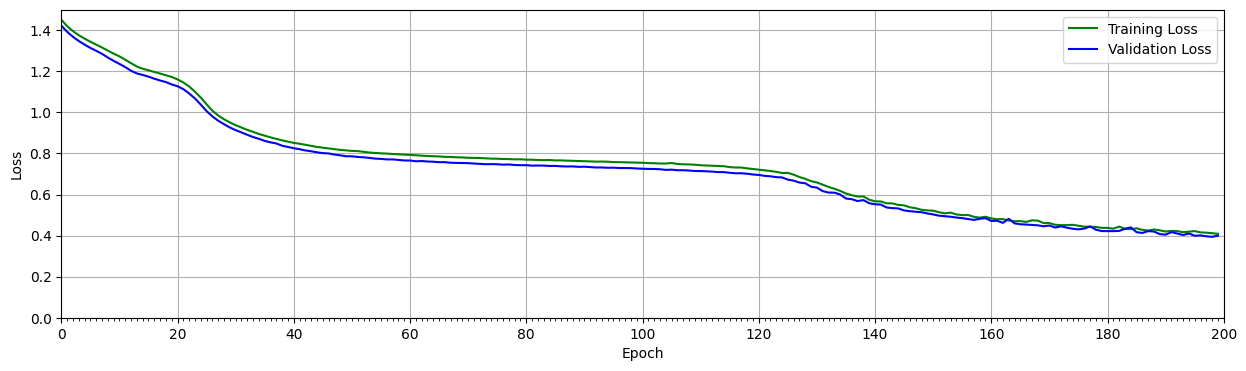

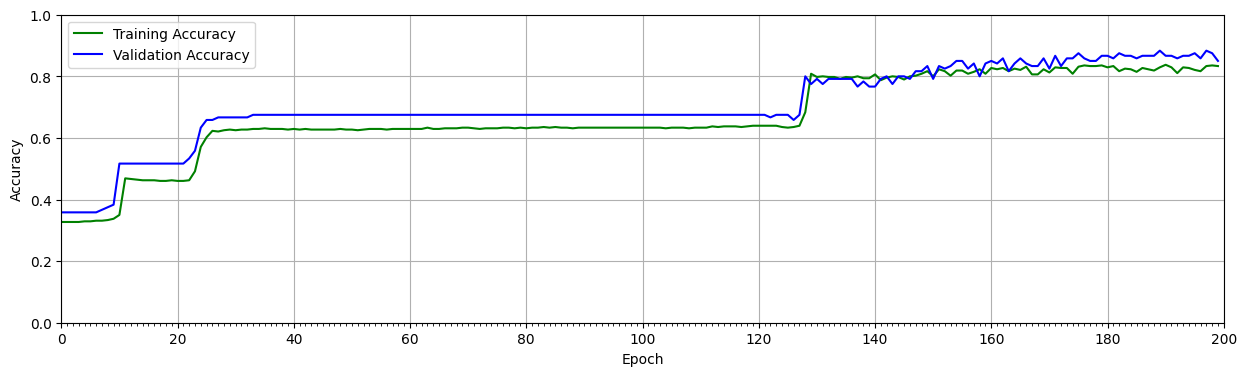

19599/19599 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step


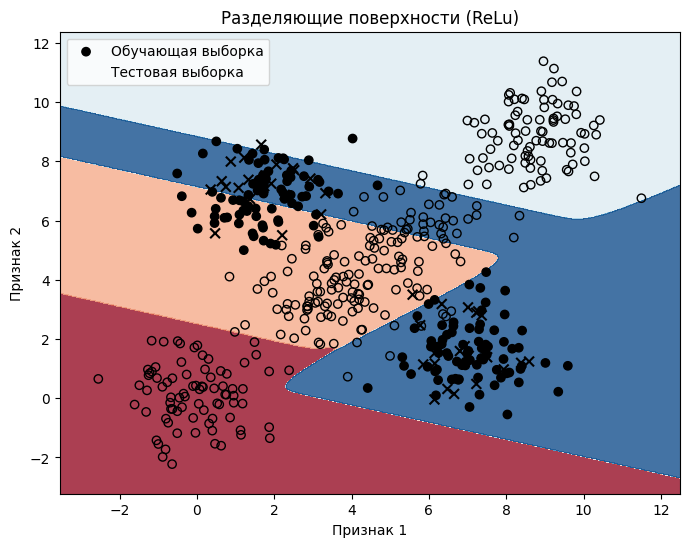

In [ ]:
def sigmoid_b10(x):
    return tfm.divide(1.0, tfm.add(1.0, tfm.exp(tfm.multiply(x, -10.0))))

model = Sequential()
initializer = GlorotNormal()
model.add(Dense(feature_vector_length, input_shape=input_shape, activation=Activation(sigmoid_b10), kernel_initializer=initializer))
model.add(Dense(6, activation=Activation(sigmoid_b10), kernel_initializer=initializer))
model.add(Dense(num_classes, activation='softmax', kernel_initializer=initializer))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

epochs = 200

training_results = model.fit(X_train, y_train, batch_size=16, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

train_loss = training_results.history["loss"]
train_acc  = training_results.history["accuracy"]
valid_loss = training_results.history["val_loss"]
valid_acc  = training_results.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
            xlim = [0, epochs],
            ylim = [0.0, 1.5],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
            xlim = [0, epochs],
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

plot_surfaces(model)

In [ ]:
model_new_3 = model

Epoch 1/600
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.3387 - loss: 1.5170 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2917 - val_loss: 1.5227 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/600
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3150 - loss: 1.4937 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.3167 - val_loss: 1.4990 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/600
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3031 - loss: 1.4707 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.3167 - val_loss: 1.4785 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/600
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3522 - loss: 1.4467 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.3167 - val_loss: 1.4599 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/600
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3382 - loss: 1.4125 - precision: 0

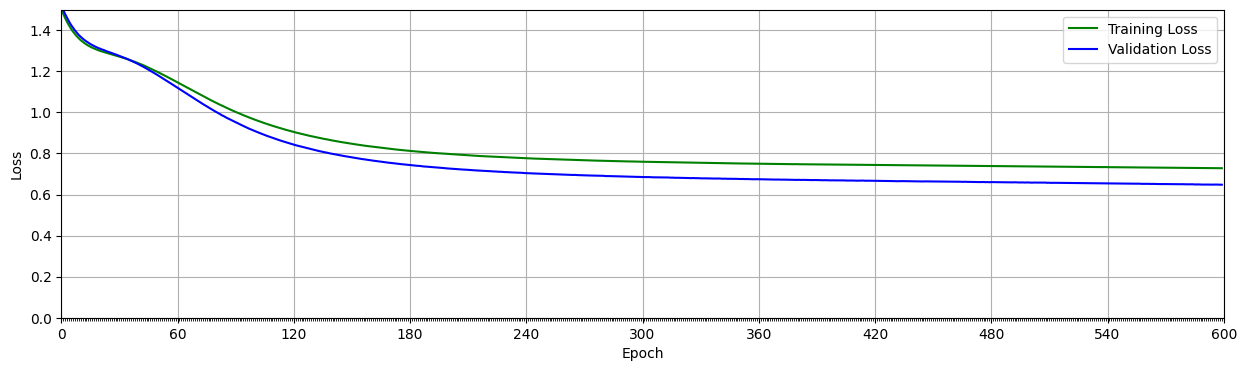

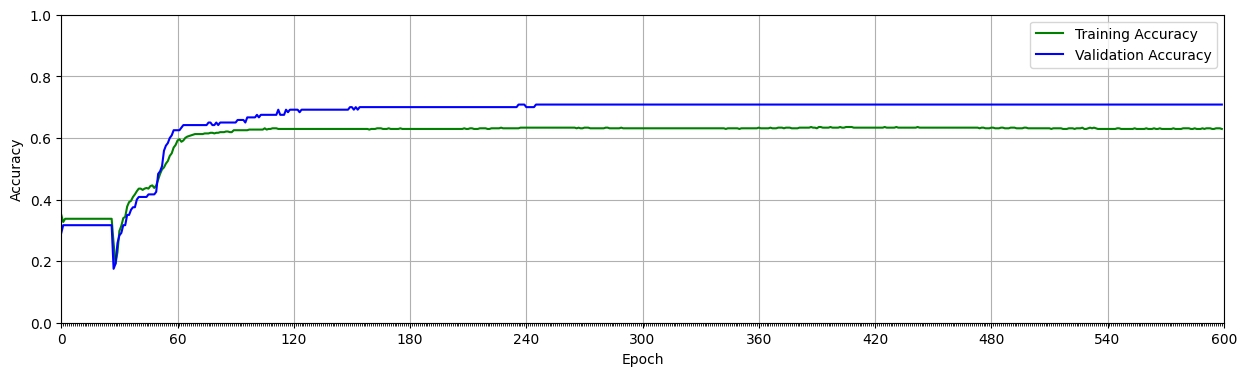

19599/19599 ━━━━━━━━━━━━━━━━━━━━ 27s 1ms/step


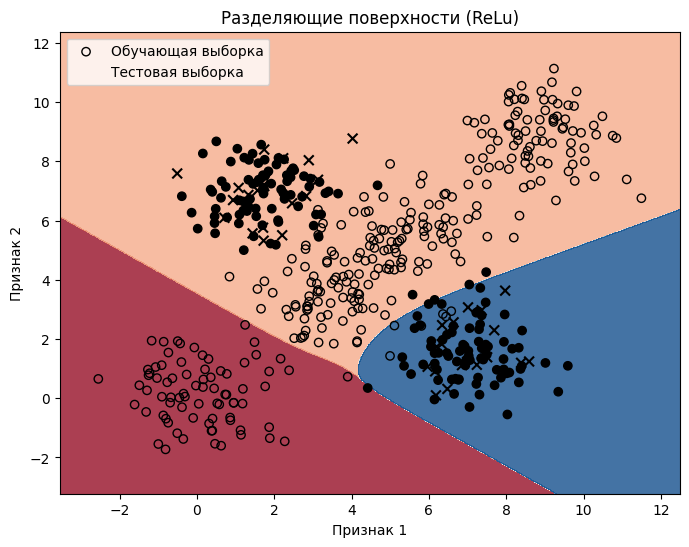

In [ ]:
model = Sequential()
initializer = HeNormal()
model.add(Dense(feature_vector_length, input_shape=input_shape, activation='sigmoid', kernel_initializer=initializer))
model.add(Dense(2, activation='sigmoid', kernel_initializer=initializer))
model.add(Dense(num_classes, activation='sigmoid', kernel_initializer=initializer))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall'],
)

epochs = 600

training_results = model.fit(X_train, y_train, batch_size=16, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

train_loss = training_results.history["loss"]
train_acc  = training_results.history["accuracy"]
valid_loss = training_results.history["val_loss"]
valid_acc  = training_results.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
            xlim = [0, epochs],
            ylim = [0.0, 1.5],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
            xlim = [0, epochs],
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

plot_surfaces(model)

In [ ]:
weights, biases = model.layers[-1].get_weights()
print("Весовая матрица выходного слоя:\n", weights)
print("Смещения выходного слоя:\n", biases)
print()

Весовая матрица выходного слоя:
 [[  6.353617   -2.6359727  -8.169462   -2.8181417]
 [-10.290446   -3.1942894  -2.1407878   4.5190086]]
Смещения выходного слоя:
 [-3.6994073  1.2578223  0.7347326 -1.0453583]



Весовая матрица выходного слоя:
 [[  6.353617   -2.6359727  -8.169462   -2.8181417]
 [-10.290446   -3.1942894  -2.1407878   4.5190086]]
Смещения выходного слоя:
 [-3.6994073  1.2578223  0.7347326 -1.0453583]


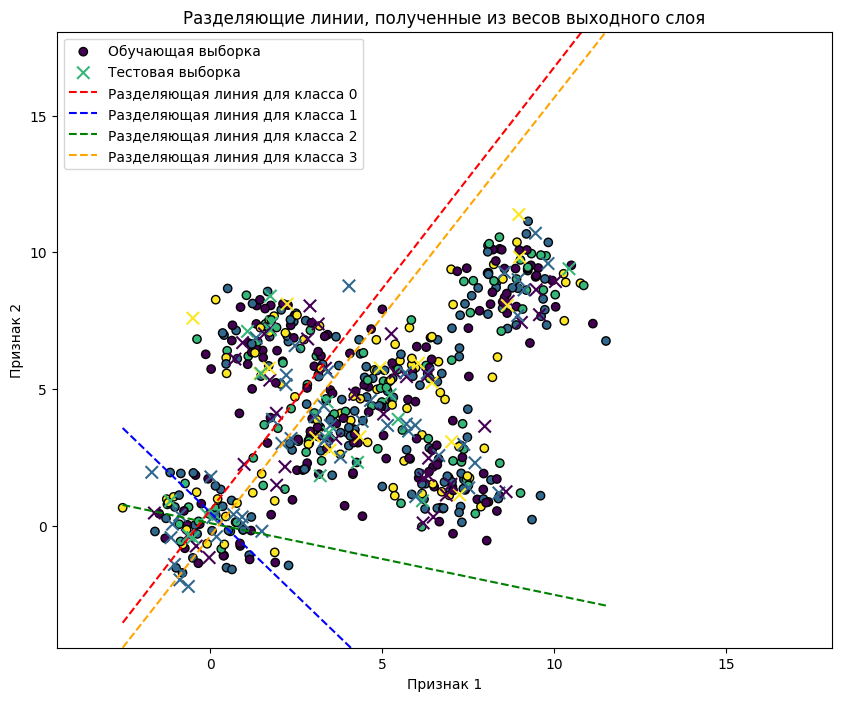

In [ ]:
# В данном подходе можно попытаться интерпретировать веса выходного слоя как параметры разделяющих гиперплоскостей.
# Так как активация выходного слоя – sigmoid, каждый выходной нейрон вычисляет:
#   z = w1*x1 + w2*x2 + b, а выход = sigmoid(z)
# Для классификации можно рассматривать границу z==0
# Получим веса из последнего слоя.
weights, biases = model.layers[-1].get_weights()
print("Весовая матрица выходного слоя:\n", weights)
print("Смещения выходного слоя:\n", biases)

# Для каждого выходного нейрона разделяющая линия определяется уравнением:
#  w1*x1 + w2*x2 + b = 0  =>  x2 = -(w1/w2)*x1 - b/w2
x_vals = np.linspace(np.min(X), np.max(X), 100)

plt.figure(figsize=(10,8))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train_orig, edgecolors='k', label='Обучающая выборка')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test_orig, marker='x', s=80, label='Тестовая выборка')
colors = ['red', 'blue', 'green', 'orange']
for i in range(num_classes):
    w = weights[0:2, i]  # так как предыдущий слой имеет 6 нейронов, а не 2,
                         # для интерпретации "как угловые коэффициенты" примем только первые 2 веса,
                         # предполагая, что связь с исходным пространством задается именно ими.
    b = biases[i]
    # Если второй вес близок к 0, то избежать деления на ноль.
    if np.abs(w[1]) > 1e-6:
        y_vals = -(w[1]/w[0])*x_vals - b/w[0]
        plt.plot(x_vals, y_vals, color=colors[i], linestyle='--',
                 label=f'Разделяющая линия для класса {i}')
plt.xlim(np.min(y_vals), np.max(y_vals))
plt.ylim(np.min(y_vals), np.max(y_vals))
plt.title("Разделяющие линии, полученные из весов выходного слоя")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.legend()
plt.show()

Уникальные классы и их количество: (array([0, 1, 2, 3]), array([200, 200, 100, 100]))


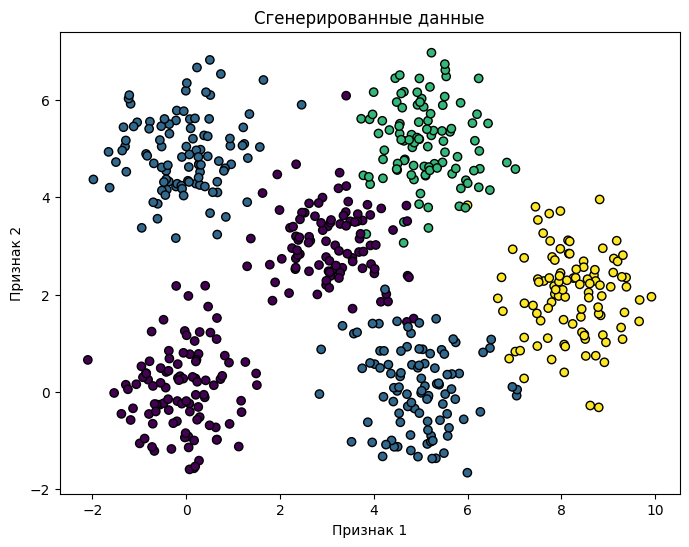

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 6)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │              28 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52 (208.00 B)

 Trainable params: 52 (208.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2117 - loss: 1.5383 - val_accuracy: 0.3417 - val_loss: 1.6307
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3989 - loss: 1.4922 - val_accuracy: 0.3167 - val_loss: 1.5612
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3554 - loss: 1.4658 - val_accuracy: 0.3167 - val_loss: 1.5045
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3551 - loss: 1.4363 - val_accuracy: 0.3167 - val_loss: 1.4584
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3125 - loss: 1.4106 - val_accuracy: 0.3167 - val_loss: 1.4202
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3352 - loss: 1.3832 - val_accuracy: 0.3167 - val_loss: 1.3892
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3436 - loss: 1.3679 - val_accuracy: 0.3167 - val_loss: 1.3644
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3263 - loss: 1.3578 - val_accuracy: 0.3167 - 

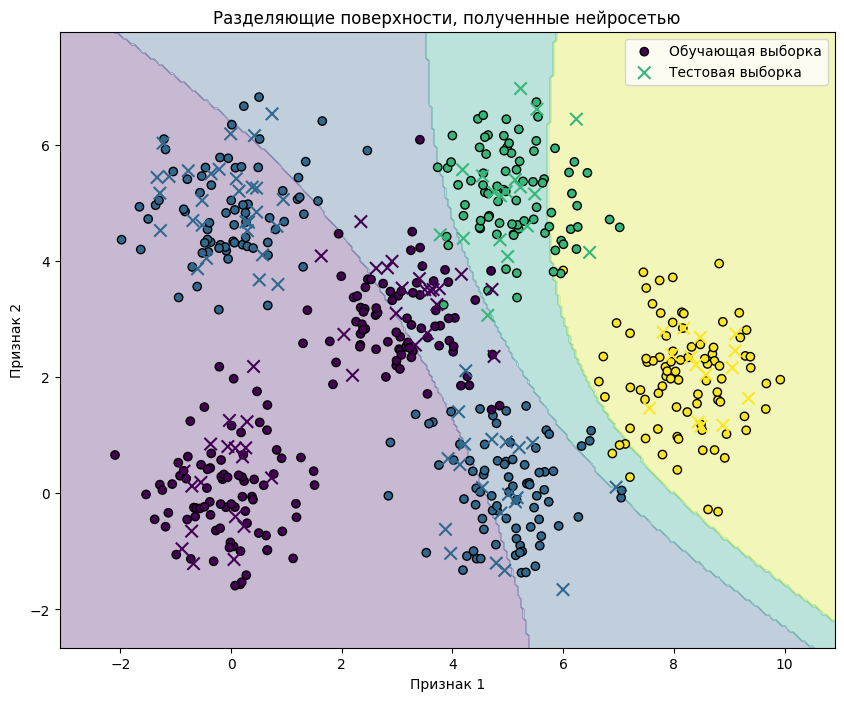

Весовая матрица выходного слоя:
 [[-1.9972532  -1.8661405   0.9837878   1.847645  ]
 [ 0.31115094  0.544615   -0.04064034 -1.4179385 ]
 [ 0.47966737  1.3093889  -1.0746703  -1.2754487 ]
 [ 1.4163177  -0.08076267 -1.1763988  -2.1074927 ]
 [-2.2177997  -1.234075    1.8814479   2.1729462 ]
 [ 0.49618694 -0.42567796 -0.6020907   0.45794556]]
Смещения выходного слоя:
 [-0.28093487  0.20713337  0.07937304 -0.02681416]


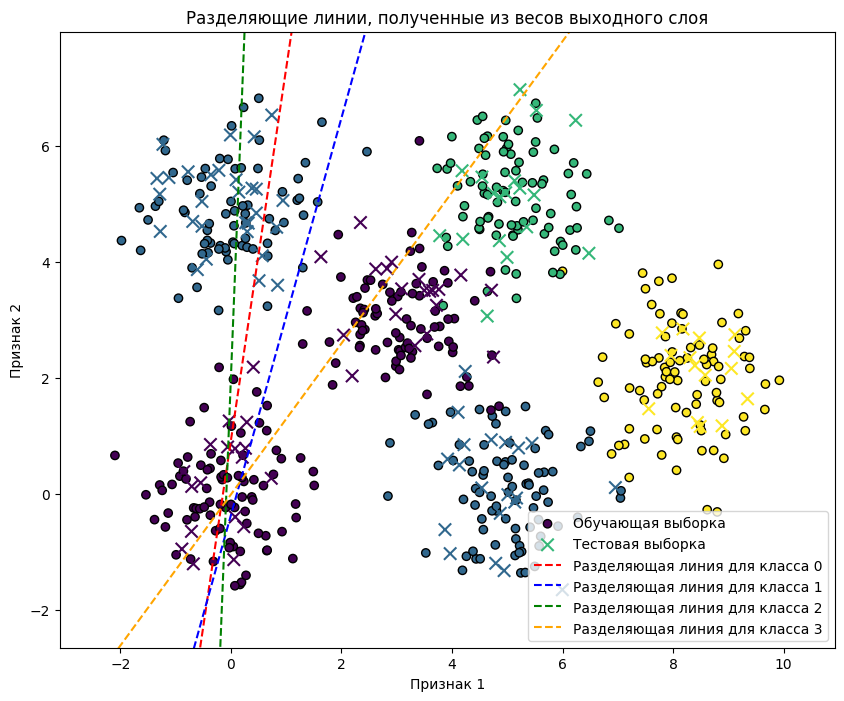

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# 1. Генерация датасета
# Определим 6 центров (кластеров). Каждый кластер будет содержать около 100 примеров
centers = [[0, 0], [3, 3], [0, 5], [5, 0], [5, 5], [8, 2]]
X, y = make_blobs(n_samples=600, centers=centers, cluster_std=0.8, random_state=42)

# Присвоим метки 4 классам.
# Для этого, например, первые 2 центра — класс 0, следующий 2 — класc 1, пятый – класс 2, шестой – класс 3.
# Если кластеров больше, то можно объединять их так, чтобы получилось 4 уникальных метки.
y_mapped = []
for i, label in enumerate(y):
    # Проверяем, к какому кластеру принадлежит точка и отображаем его на класс:
    if label in [0, 1]:
        y_mapped.append(0)
    elif label in [2, 3]:
        y_mapped.append(1)
    elif label == 4:
        y_mapped.append(2)
    else:
        y_mapped.append(3)
y = np.array(y_mapped)

# Проверяем, чтобы классов было не менее 4 и в каждом классе минимум 50 примеров
print("Уникальные классы и их количество:", np.unique(y, return_counts=True))

# Визуализация исходных данных
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', edgecolors='k')
plt.title("Сгенерированные данные")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()

# 2. Подготовка данных для обучения
num_classes = 4
X_train, X_test, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = to_categorical(y_train_orig, num_classes)
y_test  = to_categorical(y_test_orig, num_classes)
input_shape = (2,)  # двумерное пространство

# 3. Построение модели с явной инициализацией весов
initializer = GlorotNormal(seed=42)

model = Sequential()
# Входной слой: 2 нейрона; вход — двумерный вектор.
# Здесь для демонстрации также происходит линейное преобразование с активацией sigmoid.
model.add(Dense(2, input_shape=input_shape, activation='sigmoid', kernel_initializer=initializer))
# Скрытый слой: 6 нейронов, активация sigmoid.
model.add(Dense(6, activation='sigmoid', kernel_initializer=initializer))
# Выходной слой: 4 нейрона (по числу классов) с активацией sigmoid.
model.add(Dense(num_classes, activation='sigmoid', kernel_initializer=initializer))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

# 4. Обучение модели
epochs = 200
history = model.fit(X_train, y_train, batch_size=16, epochs=epochs, verbose=1,
                    validation_data=(X_test, y_test))

# 5. Визуализация разделяющих поверхностей
# Создадим равномерную сетку по входному пространству
h = 0.05  # шаг сетки
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Получение прогнозов модели
# Вычисляем выход, затем для каждой точки выбираем класс с наибольшей активацией
predictions = model.predict(grid_points)
pred_classes = np.argmax(predictions, axis=1)
pred_classes = pred_classes.reshape(xx.shape)

plt.figure(figsize=(10,8))
plt.contourf(xx, yy, pred_classes, alpha=0.3, cmap='viridis')
plt.scatter(X_train[:,0], X_train[:,1], c=y_train_orig, edgecolors='k', label='Обучающая выборка')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test_orig, marker='x', s=80, label='Тестовая выборка')
plt.title("Разделяющие поверхности, полученные нейросетью")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.legend()
plt.show()

# 6. Визуализация разделяющих линий, полученных с помощью весовых коэффициентов выходного слоя
# В данном подходе можно попытаться интерпретировать веса выходного слоя как параметры разделяющих гиперплоскостей.
# Так как активация выходного слоя – sigmoid, каждый выходной нейрон вычисляет:
#   z = w1*x1 + w2*x2 + b, а выход = sigmoid(z)
# Для классификации можно рассматривать границу z==0
# Получим веса из последнего слоя.
weights, biases = model.layers[-1].get_weights()
print("Весовая матрица выходного слоя:\n", weights)
print("Смещения выходного слоя:\n", biases)

# Для каждого выходного нейрона разделяющая линия определяется уравнением:
#  w1*x1 + w2*x2 + b = 0  =>  x2 = -(w1/w2)*x1 - b/w2
x_vals = np.linspace(x_min, x_max, 100)

plt.figure(figsize=(10,8))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train_orig, edgecolors='k', label='Обучающая выборка')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test_orig, marker='x', s=80, label='Тестовая выборка')
colors = ['red', 'blue', 'green', 'orange']
for i in range(num_classes):
    w = weights[0:2, i]  # так как предыдущий слой имеет 6 нейронов, а не 2,
                         # для интерпретации "как угловые коэффициенты" примем только первые 2 веса,
                         # предполагая, что связь с исходным пространством задается именно ими.
    b = biases[i]
    # Если второй вес близок к 0, то избежать деления на ноль.
    if np.abs(w[1]) > 1e-6:
        y_vals = -(w[0]/w[1])*x_vals - b/w[1]
        plt.plot(x_vals, y_vals, color=colors[i], linestyle='--',
                 label=f'Разделяющая линия для класса {i}')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title("Разделяющие линии, полученные из весов выходного слоя")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.legend()
plt.show()
